# Example of an analysis 

First read some libraries needed. 


In [107]:
import numpy as np
import scipy.integrate
import scipy.optimize
import scipy.linalg

import matplotlib.pyplot as plt
import seaborn as sns
import sympy as symp 


%matplotlib inline

### Definfing the right hand side function
This can be changed, or another can be defined later on. The example uses:

$$\dot{x}=y\left( 1-x^2\right)$$
$$\dot{y}=-x\left(1-y^2\right)$$
Example of using latex. 


In [108]:
x,y, t=symp.symbols('x y t')

f=y*(1-x**2)
g=-x*(1-y**2)
J = symp.Function('J')(x,y)

In [109]:
rhs=symp.Matrix([f,g])
eqpnts=symp.solve(rhs)
J=rhs.jacobian([x,y])
eqpnts

[{x: -1, y: -1}, {x: -1, y: 1}, {x: 0, y: 0}, {x: 1, y: -1}, {x: 1, y: 1}]


Nullclines: 

$\dot{x}=0$ at $y=0$ or $x=\pm 1$.

$\dot{y}=0$ at $x=0$ or $y=\pm 1$.

Fixed point $(0,0)$, $(\pm 1,\pm 1)$

## Fixed points

$$\dot{x}=y\left( 1-x^2\right)$$
$$\dot{y}=-x\left(1-y^2\right)$$

Fixed points at  $(0,0)$, $(\pm 1,\pm 1)$
 
 Stability: 
 
 Jacobian
 
 $$J(x,y)=\left[ \begin{array}{cc}-2xy & 1-x^2\\ -(1-y^2)& 2yx \end{array}\right] $$
 
(0,0): $J=\left[ \begin{array}{cc}0 & 1\\ -1& 0 \end{array}\right] $ $\Rightarrow$ $\lambda=\pm i$ center. 

(1, 1): $J=\left[ \begin{array}{cc}-2 & 0\\ 0 & 2 \end{array}\right] $ $\Rightarrow$ $\lambda=\pm 2$ saddle. Eigenvectors: $\lambda=2, v_1=\left[\begin{array}{c} 0 \\ 1\end{array}\right]$, $\lambda=-2, v_1=\left[\begin{array}{c} 1 \\ 0\end{array}\right]$ 



(1, -1): $J=\left[ \begin{array}{cc}2 & 0\\ 0 & -2 \end{array}\right] $ $\Rightarrow$ $\lambda=\pm 2$ saddle. Eigenvectors: $\lambda=2, v_1=\left[\begin{array}{c} 1 \\ 0\end{array}\right]$, $\lambda=-2, v_1=\left[\begin{array}{c} 0 \\ 1\end{array}\right]$ 

(-1, 1): $J=\left[ \begin{array}{cc}2 & 1\\ 0 & -2 \end{array}\right] $ $\Rightarrow$ $\lambda=\pm 2$ saddle.

(-1, -1): $J=\left[ \begin{array}{cc}-2 & 1\\ 0 & 2 \end{array}\right] $ $\Rightarrow$ $\lambda=\pm 2$ saddle.

In [110]:
J

Matrix([
[  -2*x*y, 1 - x**2],
[y**2 - 1,    2*x*y]])

## Constructing the phase diagram

In [111]:
#Using lambdify
def rhs(xy,t):
    xv,yv=xy
    rhs_symp=symp.lambdify((x,y),[f,g])
    return np.array(rhs_symp(xv,yv))

def rhs_num(xy,t):
    x,y=xy
    dx=y*(1-x**2)
    dy=-x*(1-y**2)
    return [dx,dy]

def rhs_num1(xy,t):
    x,y=xy
    dx=-y#y*(1-x**2)
    dy=-x*(1-x**2)+y#-x*(1-y**2)
    return [dx,dy]

    

Text(0, 0.5, 'y')

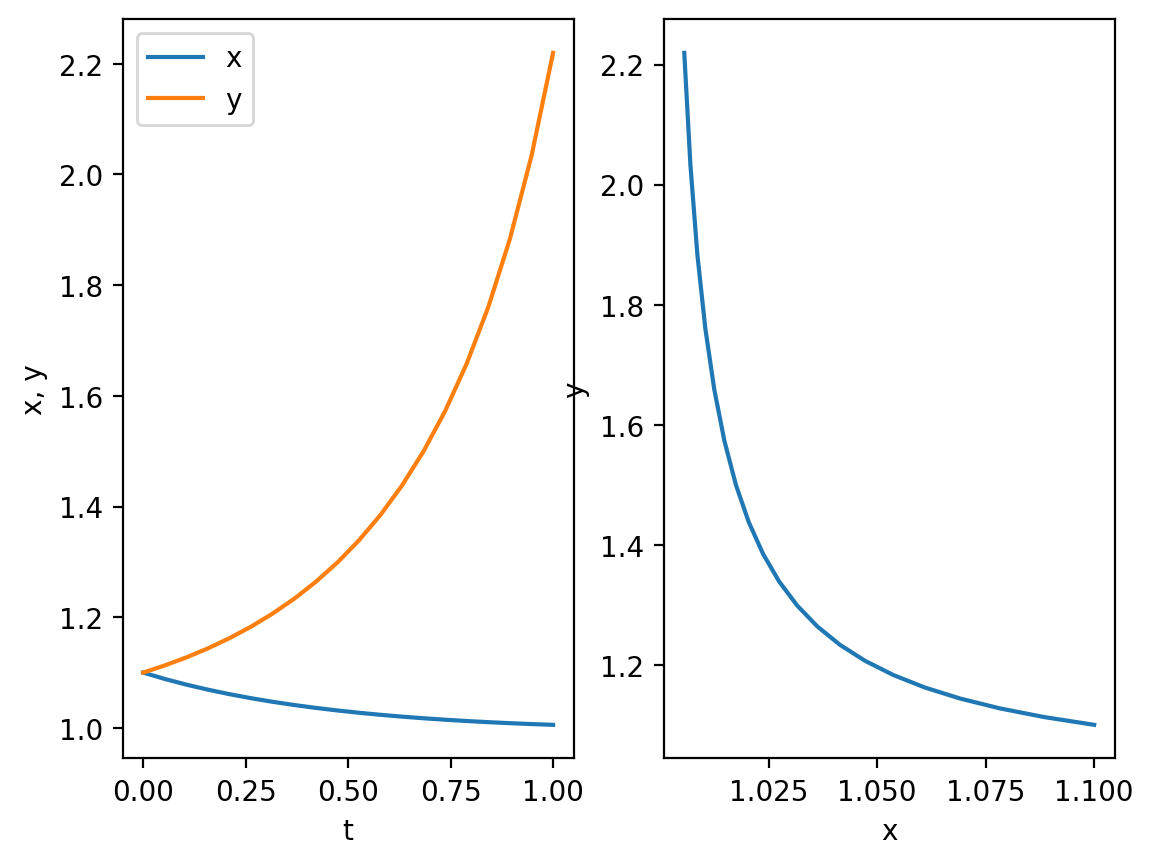

In [112]:

# Initial condition
ab0 = np.array([1.1, 1.1])

# Solve
t = np.linspace(0, 1, 20)
xy = scipy.integrate.odeint(rhs, ab0, t) 
# There is another solver we could use solve_ivp.

# Plot
plt.subplot(1,2,1)
plt.plot(t,xy)
plt.xlabel('t')
plt.ylabel('x, y')
plt.legend(('x', 'y'))

plt.subplot(1,2,2)
xx,yy=xy.T
plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')




## The phase diagram

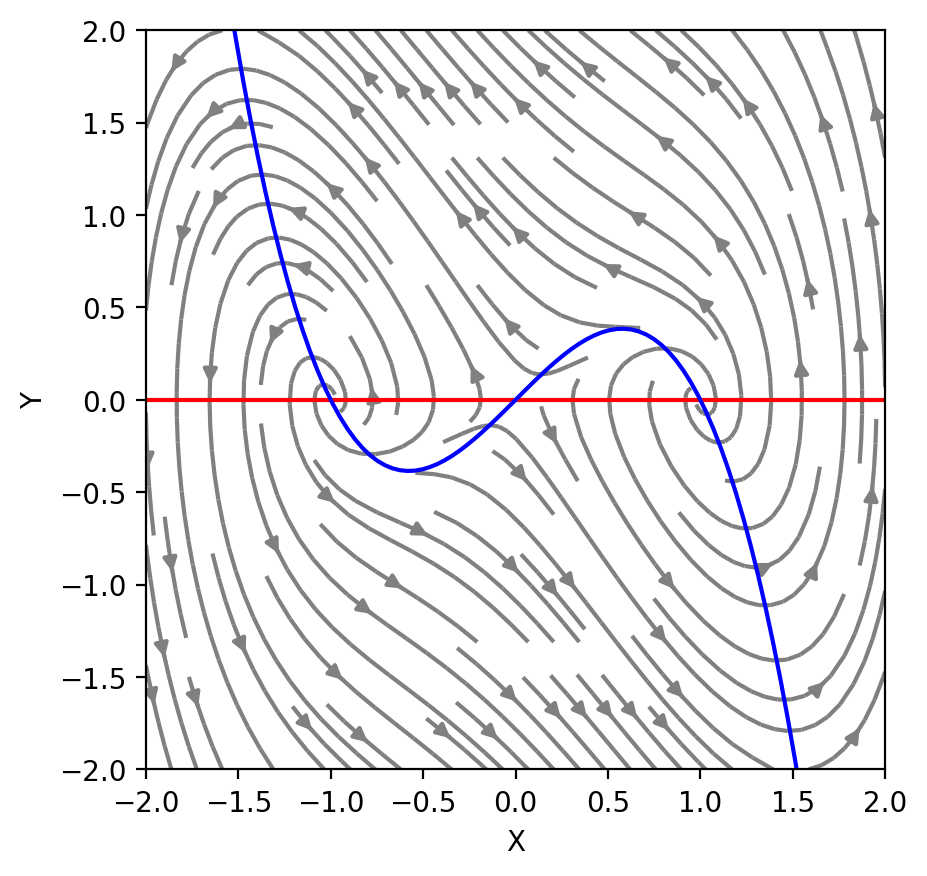

In [113]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

# Set up u,v space
u = np.linspace(-2, 2, 100)
v = np.linspace(-2, 2, 100)
uu, vv = np.meshgrid(u, v)


# Compute derivatives
u_vel = np.empty_like(uu)
v_vel = np.empty_like(vv)
for i in range(uu.shape[0]):
    for j in range(uu.shape[1]):
        u_vel[i,j], v_vel[i,j] = rhs_num1(np.array([uu[i,j], vv[i,j]]), None)


# Make stream plot
ax.streamplot(uu, vv, u_vel, v_vel,color='grey')
#Nullclines
ax.contour(uu, vv, u_vel,[0], colors=('r'))
ax.contour(uu, vv, v_vel, [0],colors=('b'))

# Plotting 
#y0=[0.25,0]
#t = np.linspace(0, 10, 20)
#y = scipy.integrate.odeint(rhs_num1, y0, t)
#ax.plot(*y.transpose(), color='green')
# Can you plot the fixed points?
# How about specific trajectories?




In [114]:

# Compute derivatives
u_vel = np.empty_like(uu)
v_vel = np.empty_like(vv)
for i in range(uu.shape[0]):
    for j in range(uu.shape[1]):
        u_vel[i,j], v_vel[i,j] = rhs_num(np.array([uu[i,j], vv[i,j]]), None)


# Make stream plot
ax.streamplot(uu, vv, u_vel, v_vel,color='grey')
#Nullclines
#ax.contour(uu, vv, u_vel, [0],colors=('r'))
#ax.contour(uu, vv, v_vel, [0],colors=('b'))

# Plotting 
y0=[0.25,0]
t = np.linspace(0, 10, 20)
y = scipy.integrate.odeint(rhs_num, y0, t)
ax.plot(*y.transpose(), color='green')
# Can you plot the fixed points?
# How about specific trajectories?




In [115]:
#A function to add fixed points to a phase diagram 
def plot_fixed_points(ax, fps, color='black'):
    """Add fixed points to plot."""
    x,y=fps
    ax.plot(x,y, '.', color='black', markerfacecolor=color, markersize=20)
    return ax